In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['image.aspect']= 'auto'

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
from sklearn.datasets import make_moons
from model_selection import train_test_split


In [52]:
def plot_boundry(algo,axis,poly_algo = None):
    XX,YY = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))
    plot_X = np.c_[XX.ravel(),YY.ravel()]
    if poly_algo is not None:
        poly_algo.fit(plot_X)
        plot_X = poly_algo.transform(plot_X)
    y = algo.predict(plot_X)
    y = y.reshape(XX.shape)
    plt.contourf(XX,YY,y,cmap=plt.cm.winter,alpha=0.75)


def scatter_2d(X,y,alpha =0.5):
    plt.scatter(X[y==0,0],X[y==0,1],c='r',alpha=alpha)
    plt.scatter(X[y==1,0],X[y==1,1],c='b',alpha=alpha)

## Voting Classifier

In [44]:
vclf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('knn_clf',KNeighborsClassifier()),
    ('dt_clf',DecisionTreeClassifier())
],voting='soft')


In [45]:
X,y = make_moons(1000,noise = 0.4)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.1)

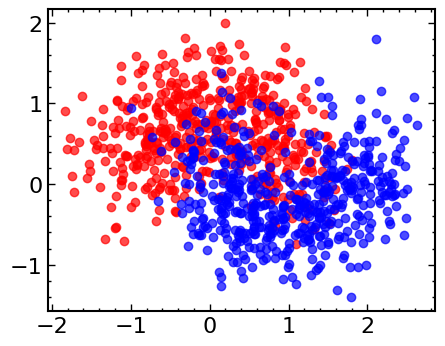

In [46]:
scatter_2d(X,y)

In [47]:
vclf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn_clf',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='min...
                              DecisionTreeCl

In [51]:
vclf.score(X_test,y_test)

0.84

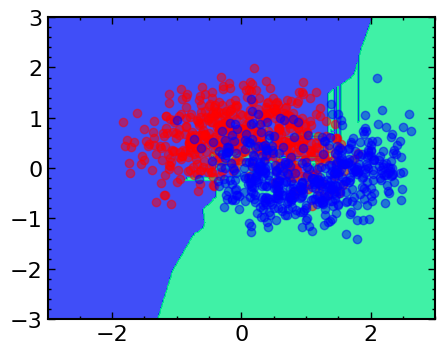

In [53]:
plot_boundry(vclf,[-3,3,-3,3])
scatter_2d(X,y)

## Bagging